<a href="https://colab.research.google.com/github/Aminah-Abo-Shlbayah/1170963_DCT/blob/main/1170963_Apply_DCT_to_an_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

*Import The Libraries that we will need in the code*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import r_
from numpy import pi
import scipy
import imageio
import ipywidgets as widgets
import IPython.display as display
from scipy.fftpack import dct


# Read the image into a matrix

At first, I uploaded an image to the colab, then I used (imageio.imread()) which read an image from the specified uri, and finaly display it in the screen

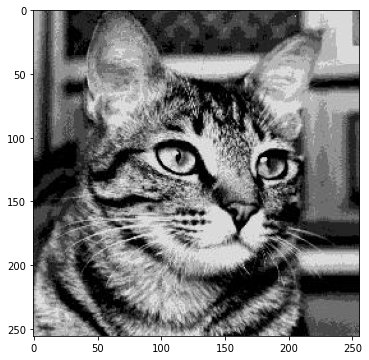

In [2]:
img=imageio.imread("dctimage.jpg")
plt.figure(figsize=(6,6))
plt.imshow(img,cmap='gray')

# Print the matrix of the image

In [11]:
print (img)

[[185 178 180 ... 145 136 113]
 [183 184 184 ... 143 139 123]
 [174 186 186 ... 137 131 122]
 ...
 [140 159 171 ... 112  79  96]
 [185 181 181 ...  92 118  77]
 [225 182 184 ... 118 108 104]]


# Apply DCT

Firstly, I seperated the image into blocks (the dimension of these blocks must be divisible by 4)lik e; 4*4, 16*16, 32*32,... 
Here i used the dimevsions of the blocks (8*8), then I applied 2D_discrete cosine transform (2D DCT) on each block

In [3]:
img_3d = img.shape
#print (img)
#print (img_3d)
dct = np.zeros(img_3d)
for i in r_[:img_3d[0]:8]:  
  for j in r_[:img_3d[1]:8]:
    dct[i:(i+8),j:(j+8)] = scipy.fftpack.dct( scipy.fftpack.dct( img[i:(i+8),j:(j+8)], axis=0, norm='ortho' ), axis=1, norm='ortho' )

# Extract 8x8 block && Display all DCT blocks

Text(0.5, 1.0, 'The DCTs Of The Image')

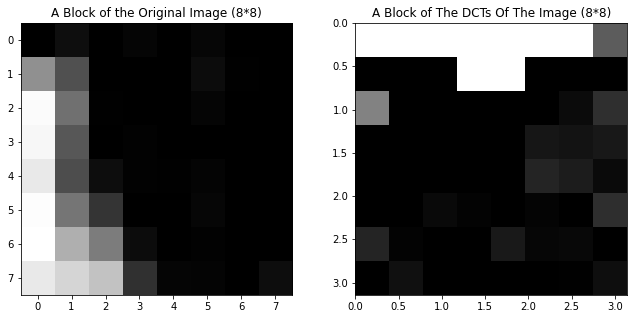

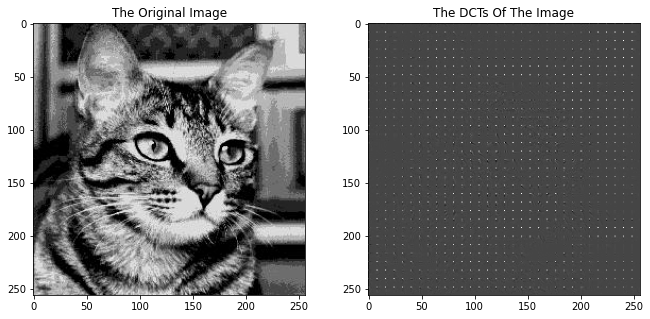

In [4]:
fig, ax = plt.subplots(1,2,figsize=(11,5))
block = 128
ax[0].imshow(img[block:block+8,block:block+8],cmap='gray')
ax[1].imshow(dct[block:block+8,block:block+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
ax[0].set_title('A Block of the Original Image (8*8)')
ax[1].set_title('A Block of The DCTs Of The Image (8*8)')

fig, ax = plt.subplots(1,2,figsize=(11,5))
ax[0].imshow(img,cmap='gray');
ax[1].imshow(dct,cmap='gray');
ax[0].set_title('The Original Image')
ax[1].set_title('The DCTs Of The Image')


# DCT => K Coeffcients

# 1- Here I used small K = 0.012

I Convert the last K coeffcients to zero (multiply the last (in zigzag
scan) DCT-Coefficients by zeros while all other coeeficients are left
the same).

Keeping only 28.428650% of the DCT coefficients


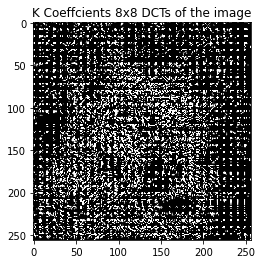

In [5]:
# K Coeffcients
k = 0.012
dct_k = dct * (abs(dct) > (k*np.max(dct)))
#print (dct_thresh)
plt.figure()
plt.imshow(dct_k,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "K Coeffcients 8x8 DCTs of the image")

percent_nonzeros = np.sum( dct_k != 0.0 ) / (img_3d[0]*img_3d[1]*1.0)

print ("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

# Apply inverse 2D-DCT transform to the modified DCT coefficients && Compare DCT compressed image with original, k= 0.012




Text(0.5, 1.0, 'The Recosntracted Image')

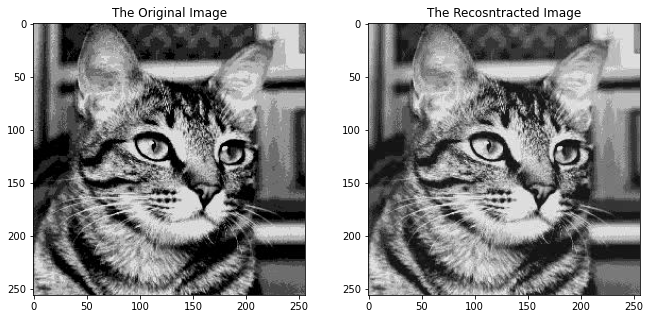

In [6]:
im_dct = np.zeros(img_3d)
for i in r_[:img_3d[0]:8]:
    for j in r_[:img_3d[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = scipy.fftpack.idct( scipy.fftpack.idct( dct_k[i:(i+8),j:(j+8)], axis=0 , norm='ortho'), axis=1 , norm='ortho')
        
fig, ax = plt.subplots(1,2,figsize=(11,5))
ax[0].imshow(img,cmap='gray');
ax[1].imshow(im_dct,cmap='gray');

ax[0].set_title('The Original Image')
ax[1].set_title('The Recosntracted Image')


>> I noticed that when I use small k_coeffcients, I get A clear reconstructed_image and close to the original image <<

# 2- Here I used K = 0.1

Keeping only 2.296448% of the DCT coefficients


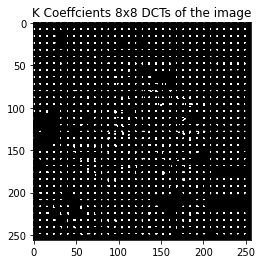

In [7]:
# K Coeffcients
k = 0.1
dct_k2 = dct * (abs(dct) > (k*np.max(dct)))
#print (dct_thresh)
plt.figure()
plt.imshow(dct_k2,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "K Coeffcients 8x8 DCTs of the image")

percent_nonzeros = np.sum( dct_k2 != 0.0 ) / (img_3d[0]*img_3d[1]*1.0)

print ("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

# Apply inverse 2D-DCT transform to the modified DCT coefficients && Compare DCT compressed image with original k= 0.1

Text(0.5, 1.0, 'The Recosntracted Image')

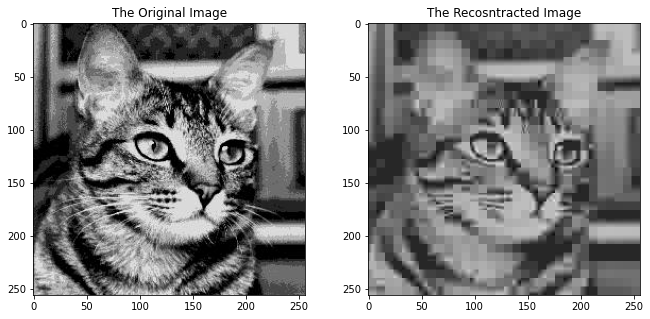

In [8]:
im_dct = np.zeros(img_3d)
for i in r_[:img_3d[0]:8]:
    for j in r_[:img_3d[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = scipy.fftpack.idct( scipy.fftpack.idct( dct_k2[i:(i+8),j:(j+8)], axis=0 , norm='ortho'), axis=1 , norm='ortho')
        
fig, ax = plt.subplots(1,2,figsize=(11,5))
ax[0].imshow(img,cmap='gray');
ax[1].imshow(im_dct,cmap='gray');

ax[0].set_title('The Original Image')
ax[1].set_title('The Recosntracted Image')


>> I noticed that when I use greater k_coeffcients, I get A less clear reconstructed_ image <<

# 3- Here I used big K = 0.5

Keeping only 0.770569% of the DCT coefficients


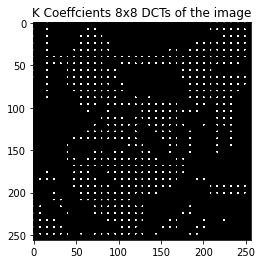

In [9]:
# K Coeffcients
k = 0.5
dct_k3 = dct * (abs(dct) > (k*np.max(dct)))
#print (dct_thresh)
plt.figure()
plt.imshow(dct_k3,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "K Coeffcients DCTs of the image")

percent_nonzeros = np.sum( dct_k3 != 0.0 ) / (img_3d[0]*img_3d[1]*1.0)

print ("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

# Apply inverse 2D-DCT transform to the modified DCT coefficients && Compare DCT compressed image with original k= 0.5

Text(0.5, 1.0, 'The Recosntracted Image')

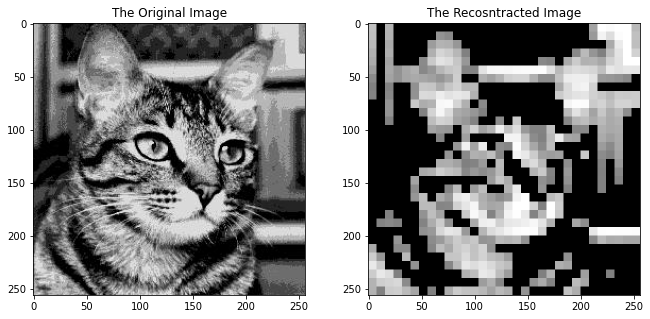

In [10]:
im_dct = np.zeros(img_3d)
for i in r_[:img_3d[0]:8]:
    for j in r_[:img_3d[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = scipy.fftpack.idct( scipy.fftpack.idct( dct_k3[i:(i+8),j:(j+8)], axis=0 , norm='ortho'), axis=1 , norm='ortho')
        
fig, ax = plt.subplots(1,2,figsize=(11,5))
ax[0].imshow(img,cmap='gray');
ax[1].imshow(im_dct,cmap='gray');

ax[0].set_title('The Original Image')
ax[1].set_title('The Recosntracted Image')


>> I noticed that When I increased the value of K more, the clarity of the reconstructed_image becomes less <<

** I noticed that the lower the k value, the clearer the images and closer to the original image **